In [1]:
#!pip install "git+https://github.com/greydanus/mnist1d.git@master"

In [2]:
from mnist1d.data import make_dataset, get_dataset_args

defaults = get_dataset_args()
data = make_dataset(defaults)
x,y,t = data['x'], data['y'], data['t']

x.shape, y.shape, t.shape

((4000, 40), (4000,), (40,))

In [3]:
import pandas as pd
df_feature = pd.DataFrame(x)
df_label = pd.DataFrame(y)

In [4]:
import numpy as np
label_types=np.unique(df_label.values)

In [5]:
df_label = df_label.rename(columns={0:"label"})
df = pd.concat([df_label, df_feature], axis=1, join="inner")
df = df.sort_values(by=['label'])


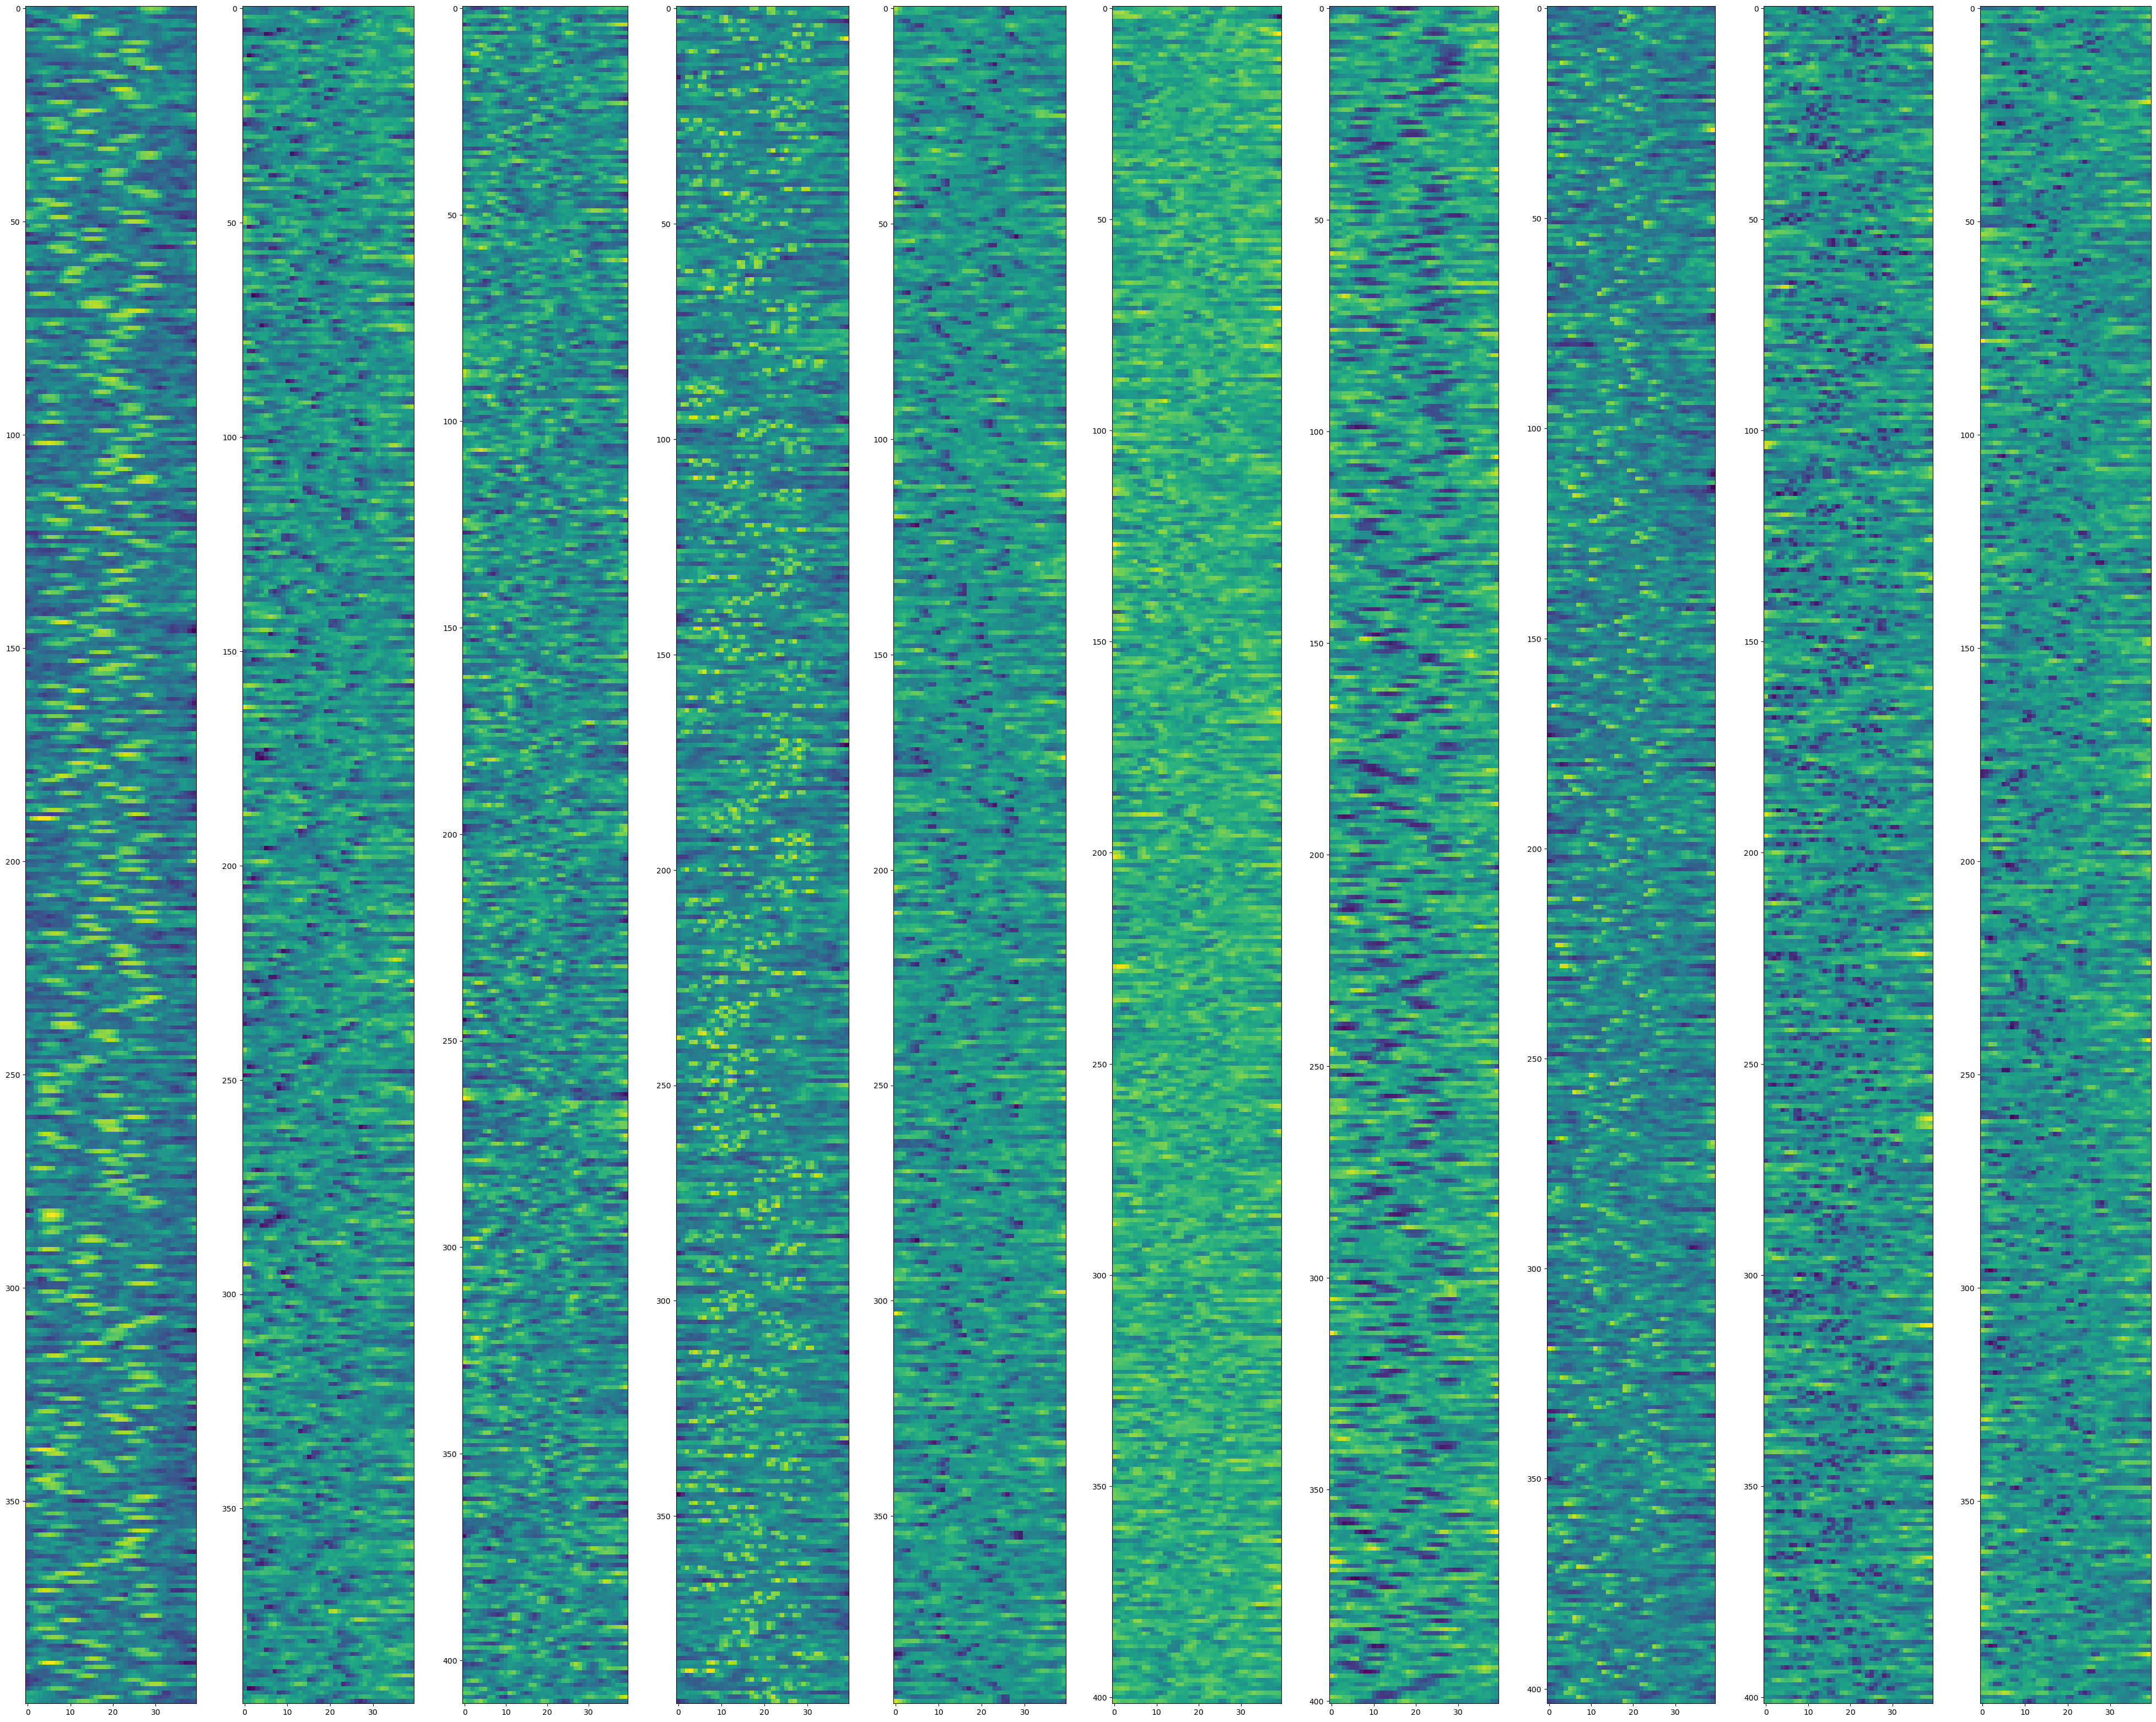

In [6]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(50, 40))
for i in range(10):
    sub_df=df[df["label"]==i]
    axs[i].imshow(sub_df.to_numpy()[:,1:])

The "0" to "9" patterns look challenging to be classified without any advanced feature engineering like using kernels in CNN or so. By eye, a couple of patterns looks much different than the others.

# Using UMAP

In [7]:
# Data visualization
import umap
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_feature)

reducer = umap.UMAP(n_components=len(label_types)) #VGG adjust the components
embedding = reducer.fit_transform(scaled_features)

embedding.shape


(4000, 10)

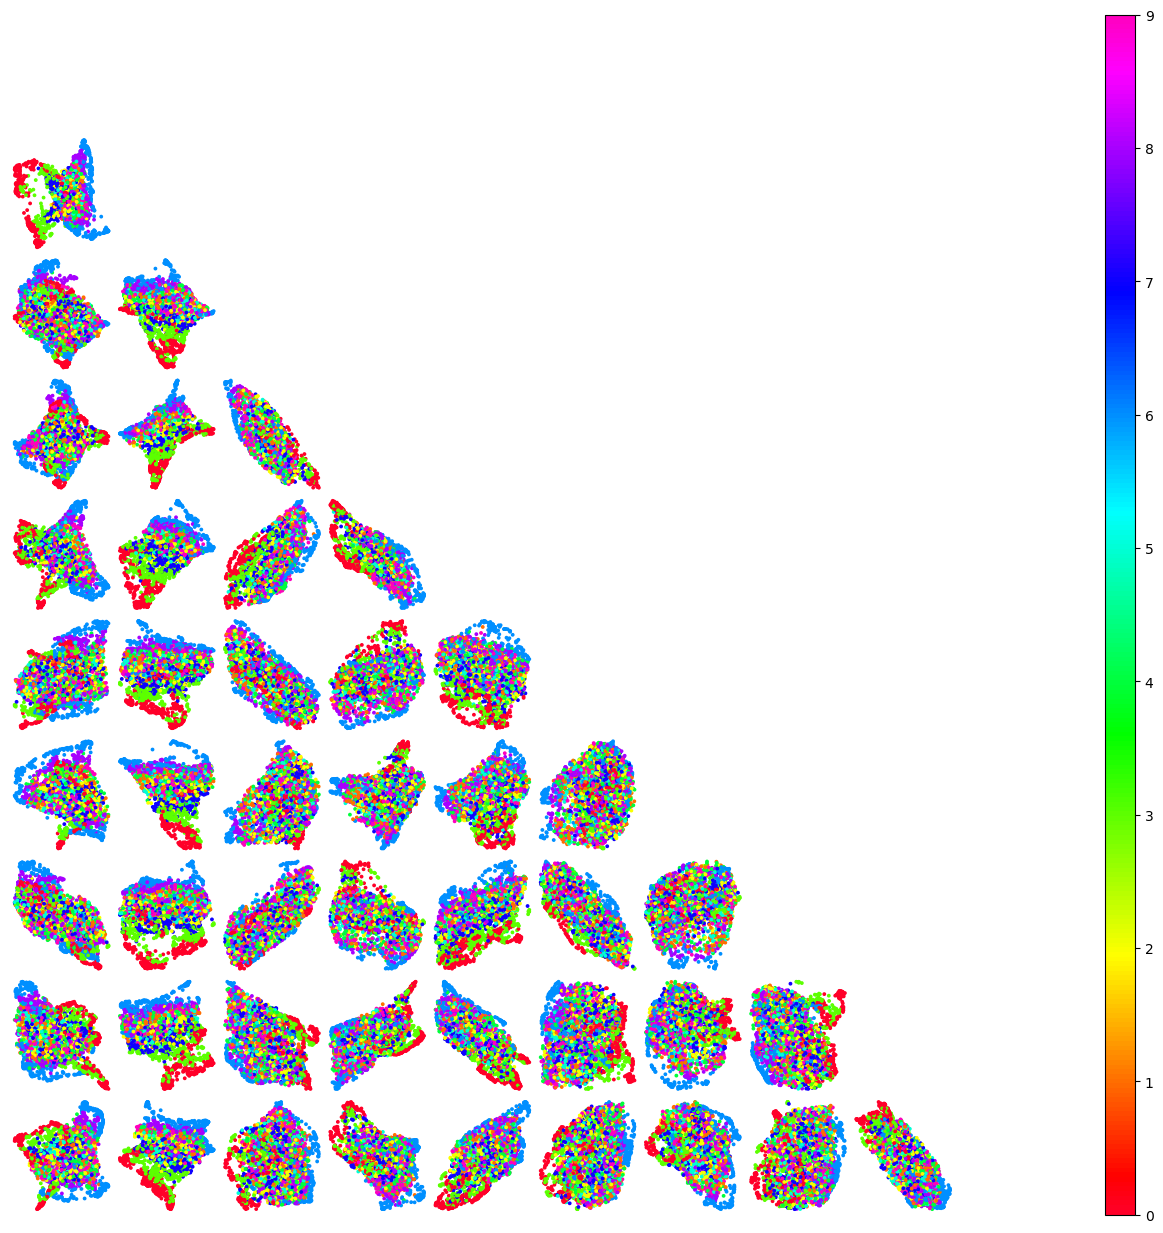

In [8]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
for i in range(embedding.shape[1]):
    for j in range(embedding.shape[1]):
        axs[i][j].set_axis_off()
        if(i>j):
            im = axs[i][j].scatter(embedding[:, i],embedding[:, j], c=y, cmap="gist_rainbow", s=3)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.02, hspace=0.02)

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

plt.show()

# Using PCA

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(label_types)) #VGG adjust the treshold to arrive at the desired number of PCA componets
features_pca = pca.fit_transform(scaled_features)
pca.n_components_

10

In [10]:
features_pca.shape

(4000, 10)

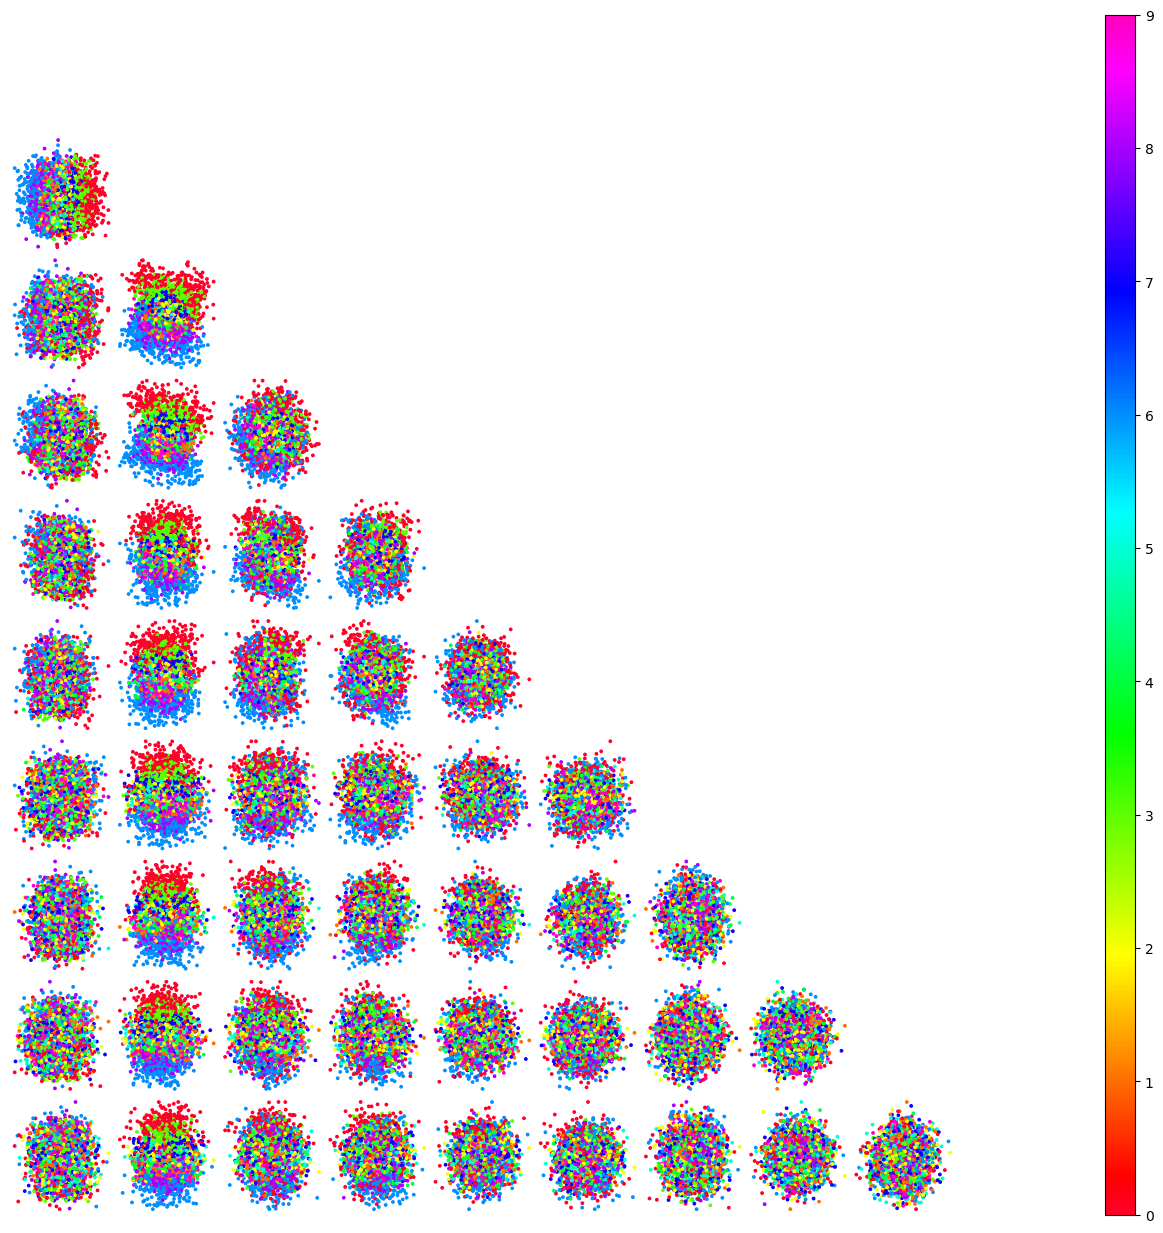

In [11]:
fig, axs = plt.subplots(10, 10, figsize=(15, 15))
for i in range(features_pca.shape[1]):
    for j in range(features_pca.shape[1]):
        axs[i][j].set_axis_off()
        if(i>j):
            axs[i][j].scatter(features_pca[:, i],features_pca[:, j], c=y, cmap="gist_rainbow", s=3)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.02, hspace=0.02)

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

plt.show()

In general, "0" and "6" could be projected to achieve separation from other patterns due to its distinct features, but the dataset seems to be challenging for clustering.